# Counterfactual Heat Maps Using the HBM

This script shows how the heat maps of p(behaviour) were produced for each of the final four candidate models. 

In [17]:
# Required packages
import itertools
from collections import defaultdict, OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
# Define values used for OR 
OR_sus=1.11
OR_sev=1.62
OR_ben=1.72
OR_bar=0.86
OR0=0.35

In [4]:
# Function which calculates p(behaviour) based on the logistic regression equation
def calculate_probability(x0, x1, x2, x3):
    p = (OR0 * OR_sus**x0 * OR_sev**x1 * OR_ben**x2 * OR_bar**x3) / (1 + (OR0 * OR_sus**x0 * OR_sev**x1 * OR_ben**x2 * OR_bar**x3))
    return p

In [5]:
# Function which returns a numpy 2d array of p(behaviour) values, averaged over a number of repeats. 
# The function takes the number of deciles/grids (num_decies) for EO and ER and the number of repeats used to average the probability values (repeat).
# The function requires pick_susceptibility(), pick_severity(), pick_benefits() and pick_barriers() to be defined prior
def calculate_average_probabilities(num_deciles, repeat):
    probabilities_repeats = np.zeros((num_deciles+1, num_deciles+1))

    for i in range(num_deciles+1):
        ER = i / num_deciles
        for j in range(num_deciles+1):
            EO = j / num_deciles
            for k in range(repeat):
                x0 = pick_susceptibility(EO, ER)
                x1 = pick_severity(EO, ER)
                x2 = pick_benefits(EO, ER)
                x3 = pick_barriers(EO, ER)
                p = calculate_probability(x0, x1, x2, x3)
                probabilities_repeats[i][j] += p

    probabilities_repeats = probabilities_repeats / repeat
    return probabilities_repeats

In [6]:
# Function used to plot the heat maps (specifically for num_deciles = 10)
def plot_probabilities(probabilities):
    labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    df_probabilities = pd.DataFrame(probabilities, index = labels, columns = labels)
    sns.set(font_scale=1.5) 
    ax = sns.heatmap(df_probabilities, cmap="coolwarm_r", cbar_kws={'label': 'Average p(behaviour)'},square=True)
    ax.invert_yaxis()
    ax.set_xlabel("EO score")
    ax.set_ylabel("ER score")
    plt.show()

# Mapping 1
High EO: high susceptibility

High EO: high severity

High ER: low benefits

High ER: low barriers

In [18]:
NUM_DECILES = 10
REPEAT = 100

## Baseline 

In [19]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

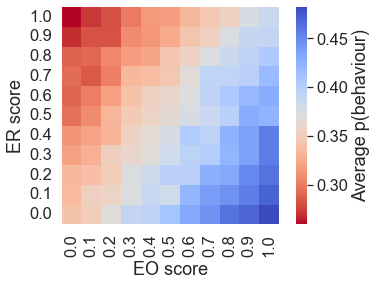

In [20]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Lockdown Restrictions

In [22]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1])

def pick_severity(EO, ER):
    return np.random.choice([0, 1])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

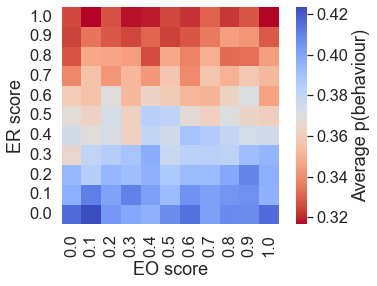

In [23]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Support Payments

In [24]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1])

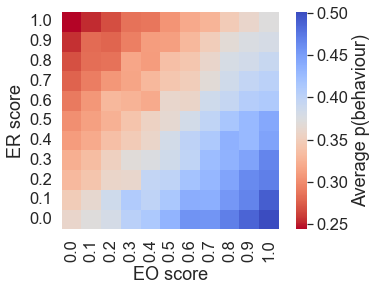

In [25]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

# Mapping 2
High EO: high susceptibility

High EO: high severity

High ER: low benefits

High EO: low barriers


## Baseline 

In [26]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[EO, 1-EO])

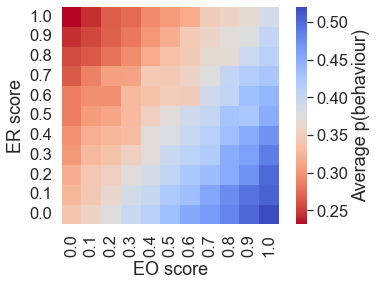

In [27]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Lockdown Restrictions

In [28]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1])

def pick_severity(EO, ER):
    return np.random.choice([0, 1])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[EO, 1-EO])

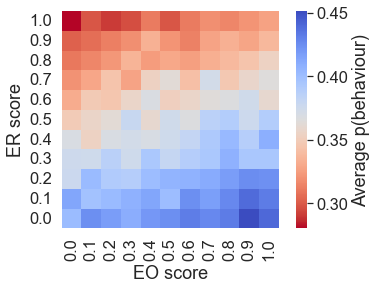

In [29]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Support Payments

In [30]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1])

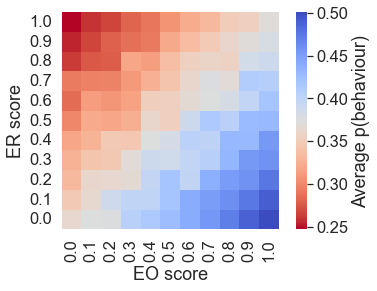

In [31]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

# Mapping 3
High EO: high susceptibility

High ER: low severity

High EO: high benefits

High ER: low barriers


## Baseline 

In [32]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

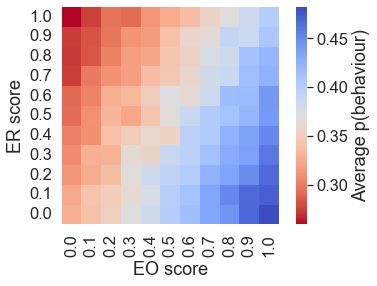

In [33]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Lockdown Restrictions

In [34]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1])

def pick_severity(EO, ER):
    return np.random.choice([0, 1])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

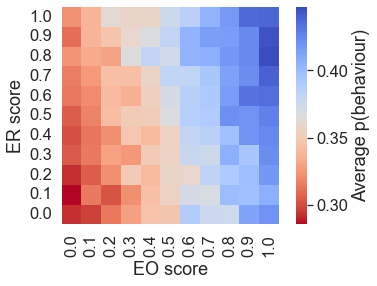

In [35]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Support Payments

In [36]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1])

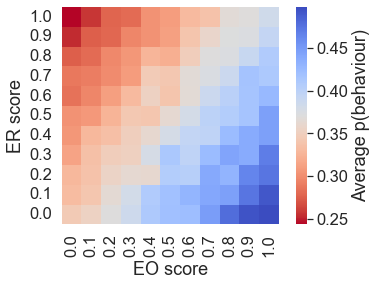

In [37]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

# Mapping 4 
High EO: high susceptibility

High ER: low severity

High EO: high benefits

High EO: low barriers


## Baseline 

In [38]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[EO, 1-EO])

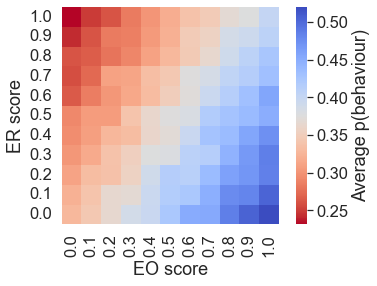

In [39]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Lockdown Restrictions

In [40]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1])

def pick_severity(EO, ER):
    return np.random.choice([0, 1])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1], p=[EO, 1-EO])

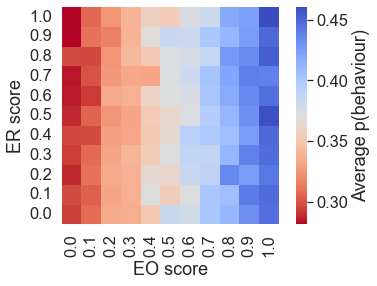

In [41]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)

## Support Payments

In [42]:
def pick_susceptibility(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_severity(EO, ER):
    return np.random.choice([0, 1], p=[ER, 1-ER])

def pick_benefits(EO, ER):
    return np.random.choice([0, 1], p=[1-EO, EO])

def pick_barriers(EO, ER):
    return np.random.choice([0, 1])

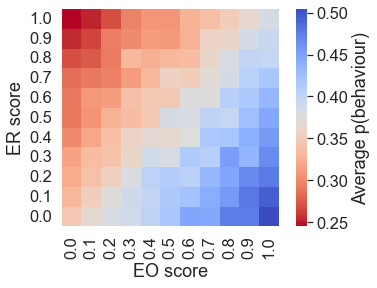

In [43]:
probabilities = calculate_average_probabilities(NUM_DECILES, REPEAT)
plot_probabilities(probabilities)